# Deep Learning

### Musel Tabares
### A00830710

Importamos librerias

In [1]:
#para utilizar tensores etc
import torch
#para el modelo
from torch import nn
#para importar datasets
import torchvision
#para transformar imagenes
import torchvision.transforms as transforms
#para visualizaciones
import matplotlib.pyplot as plt
#ver a detalle el modelo
from torchsummary import summary
# barra de progreso
from tqdm.auto import tqdm

#importamos funciones
from utils import *

c:\Users\musel\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Cifar10

Importamos datos

In [2]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transforms.ToTensor())
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Observamos la dimension de las imagenes

In [3]:
# desplegamos primer imagen
image, label = trainset[0]
image.shape, label

(torch.Size([3, 32, 32]), 6)

Observamos cantidad de datos en train y test

In [4]:
len(trainset.data), len(trainset.targets), len(testset.data), len(testset.targets)

(50000, 50000, 10000, 10000)

Creamos batches de los datos

In [26]:
batch_size = 32
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

Observamos cuantos batches se crearon

In [6]:
print(f"Length of train dataloader: {len(trainloader)} batches of {batch_size}")
print(f"Length of test dataloader: {len(testloader)} batches of {batch_size}")

Length of train dataloader: 782 batches of 64
Length of test dataloader: 157 batches of 64


visualizamos 16 imagenes de manera aleatoria

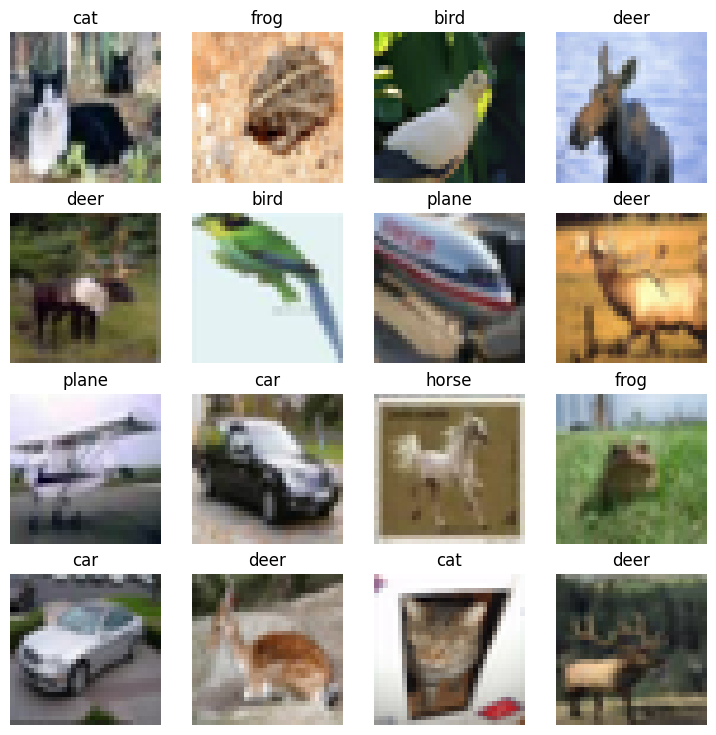

In [7]:
plot_sample_images(trainset, classes, 4, 4)

Creamos modelo

In [8]:
class conv(nn.Module):

    def __init__(self):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(3,32, kernel_size=(3,3), stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Conv2d(32,64, kernel_size=(3,3), stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2)),
            nn.Conv2d(64,256, kernel_size=(3,3), stride=1),
            nn.ReLU(),

        )
        self.block_2 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(4096, 64), 
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        return x

instanciamos el modelo

In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_0 = conv().to(device) 
summary(model_0, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             896
              ReLU-2           [-1, 32, 30, 30]               0
         MaxPool2d-3           [-1, 32, 15, 15]               0
            Conv2d-4           [-1, 64, 13, 13]          18,496
              ReLU-5           [-1, 64, 13, 13]               0
         MaxPool2d-6             [-1, 64, 6, 6]               0
            Conv2d-7            [-1, 256, 4, 4]         147,712
              ReLU-8            [-1, 256, 4, 4]               0
           Flatten-9                 [-1, 4096]               0
           Linear-10                   [-1, 64]         262,208
             ReLU-11                   [-1, 64]               0
           Linear-12                   [-1, 10]             650
          Sigmoid-13                   [-1, 10]               0
Total params: 429,962
Trainable params:

definimos funcion de perdida y optimizador

In [10]:
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(params=model_0.parameters())

corremos modelo

In [12]:

NUM_EPOCHS = 10
model_0_results = train(model=model_0, 
                        train_dataloader=trainloader,
                        test_dataloader=testloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS,
                        device=device)


 10%|█         | 1/10 [00:10<01:38, 10.99s/it]

Epoch: 1 | train_loss: 2.0208 | train_acc: 0.3043 | test_loss: 1.9209 | test_acc: 0.3851


 20%|██        | 2/10 [00:22<01:28, 11.10s/it]

Epoch: 2 | train_loss: 1.9020 | train_acc: 0.4245 | test_loss: 1.8609 | test_acc: 0.4719


 30%|███       | 3/10 [00:35<01:25, 12.24s/it]

Epoch: 3 | train_loss: 1.8583 | train_acc: 0.4710 | test_loss: 1.8420 | test_acc: 0.4918


 40%|████      | 4/10 [00:49<01:18, 13.03s/it]

Epoch: 4 | train_loss: 1.8310 | train_acc: 0.5045 | test_loss: 1.8302 | test_acc: 0.5021


 50%|█████     | 5/10 [01:04<01:08, 13.62s/it]

Epoch: 5 | train_loss: 1.8095 | train_acc: 0.5291 | test_loss: 1.8049 | test_acc: 0.5448


 60%|██████    | 6/10 [01:19<00:55, 13.90s/it]

Epoch: 6 | train_loss: 1.7858 | train_acc: 0.5581 | test_loss: 1.7883 | test_acc: 0.5737


 70%|███████   | 7/10 [01:33<00:42, 14.13s/it]

Epoch: 7 | train_loss: 1.7692 | train_acc: 0.5841 | test_loss: 1.7871 | test_acc: 0.5632


 80%|████████  | 8/10 [01:48<00:28, 14.33s/it]

Epoch: 8 | train_loss: 1.7534 | train_acc: 0.6042 | test_loss: 1.7711 | test_acc: 0.5850


 90%|█████████ | 9/10 [01:59<00:13, 13.20s/it]

Epoch: 9 | train_loss: 1.7383 | train_acc: 0.6193 | test_loss: 1.7502 | test_acc: 0.6118


100%|██████████| 10/10 [02:10<00:00, 13.07s/it]

Epoch: 10 | train_loss: 1.7237 | train_acc: 0.6377 | test_loss: 1.7421 | test_acc: 0.6242


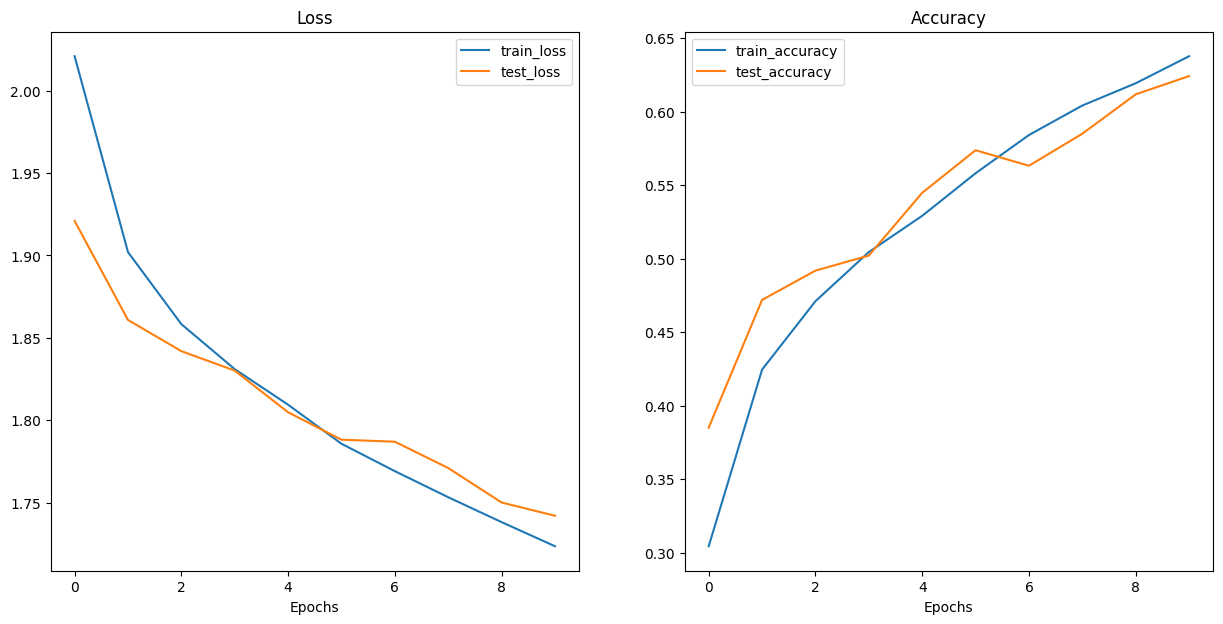

In [13]:
plot_loss_curves(model_0_results)

obtenemos una muestra de los datos del test set

In [14]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(testset), k=9):
    test_samples.append(sample)
    test_labels.append(label)


hacemos predicciones con la muestra que tomamos

In [15]:
pred_classes= make_predictions(model=model_0, data=test_samples, device=device)

In [16]:
classes[pred_classes[0]]

'plane'

visualizamos las predicciones

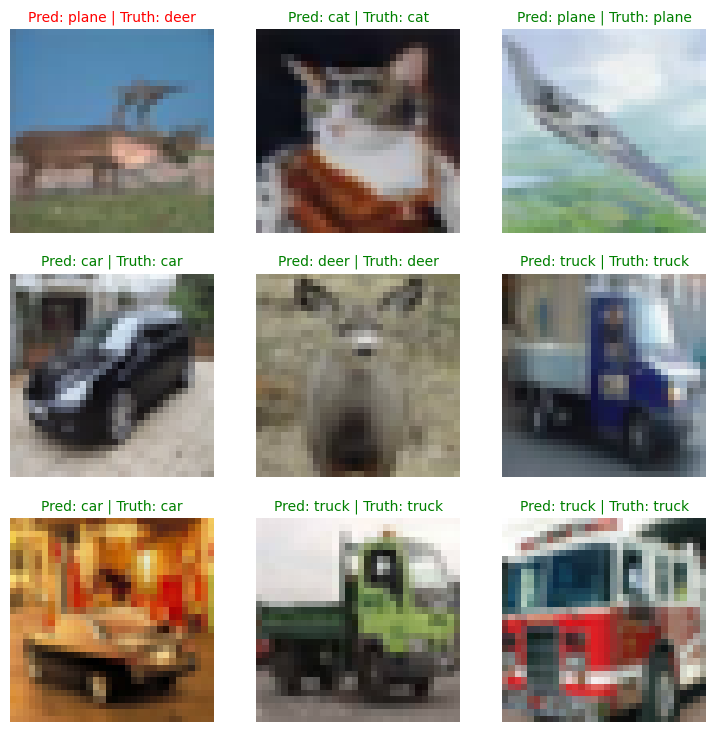

In [17]:
plot_predictions(test_samples, test_labels, classes, pred_classes)

## mejoramos accuracy

### para ello aplicamos un poco de data augmentation, batch normalization y agregamos mas capas y filtros en el modelo

In [18]:
from torchvision import transforms

In [19]:
mean,std = mean_std(trainloader)
print(mean)
print(std)

tensor([0.4914, 0.4822, 0.4466])
tensor([0.2470, 0.2435, 0.2616])


In [43]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(), 
   transforms.Normalize((mean),(std))]) 

test_transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((mean),(std))]) 


In [44]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=train_transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=test_transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

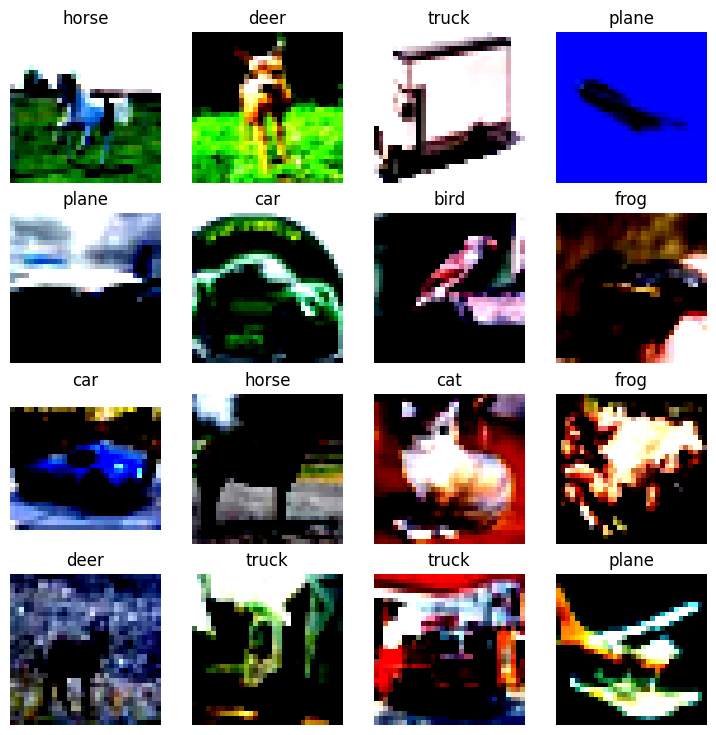

In [45]:
plot_sample_images(trainset, classes, 4, 4)

In [46]:
class conv(nn.Module):

    def __init__(self):
        super().__init__()
        self.block_1 = nn.Sequential(
           nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            )
        
        self.block_2 = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
        
    def forward(self, x):
        x = self.block_1(x)
        x = self.block_2(x)
        return x

In [47]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model_0 = conv().to(device) 
summary(model_0, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          18,496
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

In [48]:
optimizer = torch.optim.Adam(params=model_0.parameters(), lr  = 0.0001)

In [49]:

NUM_EPOCHS = 10
model_0_results = train(model=model_0, 
                        train_dataloader=trainloader,
                        test_dataloader=testloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS,
                        device=device)


 10%|█         | 1/10 [00:18<02:50, 18.99s/it]

Epoch: 1 | train_loss: 1.5957 | train_acc: 0.4056 | test_loss: 1.3171 | test_acc: 0.5115


 20%|██        | 2/10 [00:40<02:45, 20.63s/it]

Epoch: 2 | train_loss: 1.2102 | train_acc: 0.5595 | test_loss: 1.0964 | test_acc: 0.6058


 30%|███       | 3/10 [01:04<02:34, 22.12s/it]

Epoch: 3 | train_loss: 1.0035 | train_acc: 0.6430 | test_loss: 0.9250 | test_acc: 0.6780


 40%|████      | 4/10 [01:29<02:19, 23.24s/it]

Epoch: 4 | train_loss: 0.8501 | train_acc: 0.6998 | test_loss: 0.8487 | test_acc: 0.7036


 50%|█████     | 5/10 [01:54<01:59, 23.99s/it]

Epoch: 5 | train_loss: 0.7391 | train_acc: 0.7412 | test_loss: 0.7852 | test_acc: 0.7273


 60%|██████    | 6/10 [02:20<01:38, 24.56s/it]

Epoch: 6 | train_loss: 0.6490 | train_acc: 0.7737 | test_loss: 0.6748 | test_acc: 0.7639


 70%|███████   | 7/10 [02:43<01:12, 24.13s/it]

Epoch: 7 | train_loss: 0.5688 | train_acc: 0.8013 | test_loss: 0.6730 | test_acc: 0.7662


 80%|████████  | 8/10 [03:04<00:46, 23.02s/it]

Epoch: 8 | train_loss: 0.5001 | train_acc: 0.8255 | test_loss: 0.6010 | test_acc: 0.7936


 90%|█████████ | 9/10 [03:25<00:22, 22.29s/it]

Epoch: 9 | train_loss: 0.4351 | train_acc: 0.8495 | test_loss: 0.6145 | test_acc: 0.7857


100%|██████████| 10/10 [03:46<00:00, 22.62s/it]

Epoch: 10 | train_loss: 0.3835 | train_acc: 0.8672 | test_loss: 0.6071 | test_acc: 0.7975


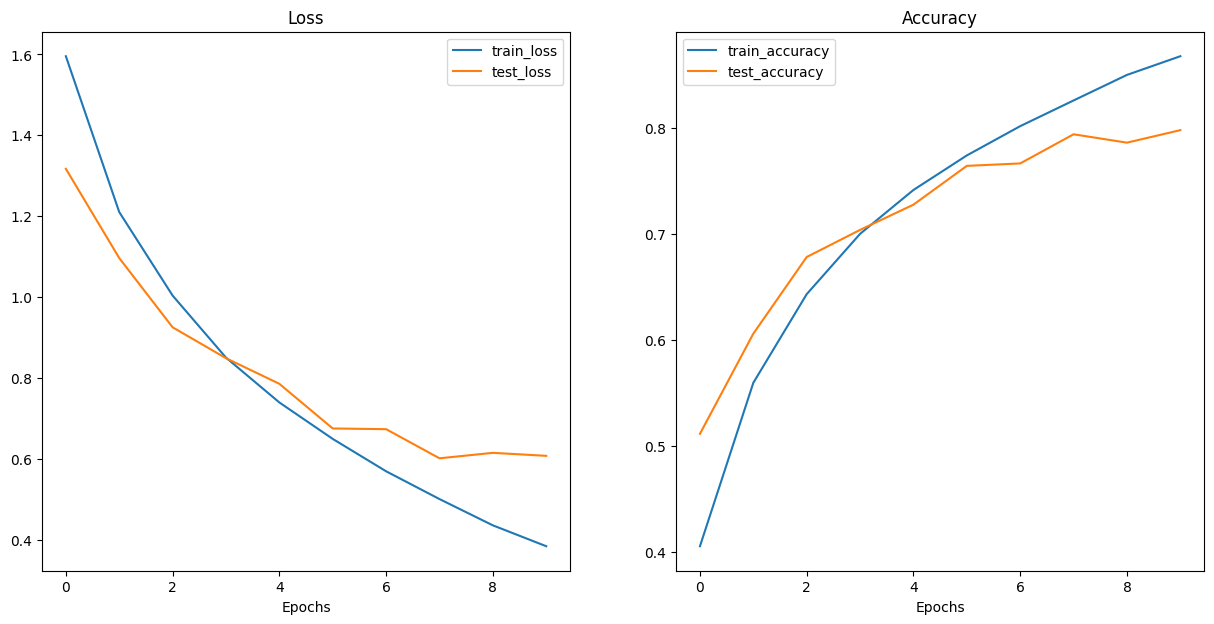

In [50]:
plot_loss_curves(model_0_results)

podemos ver que a partir de la epoca 6 los datos comienzan a sobre ajustarse lo que implicaria que le podriamos agregar dropout al modelo para mejorar